In [2]:
import numpy as np # numpy 라이브러리를 np이름으로 사용
import cv2
# Load an color image in grayscale

img = cv2.imread('messi.jpg',0)  # 이미지 흑백 처리
cv2.imshow('messi.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import numpy as np  # numpy 라이브러리를 np이름으로 사용
import cv2

img = cv2.imread('messi.jpg',) # 이미지 흑백 처리
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # ESC 누르면 종료
    cv2.destroyAllWindows()
elif k == ord('s'): # s 키 누르면 이미지 저장 후 종료
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()



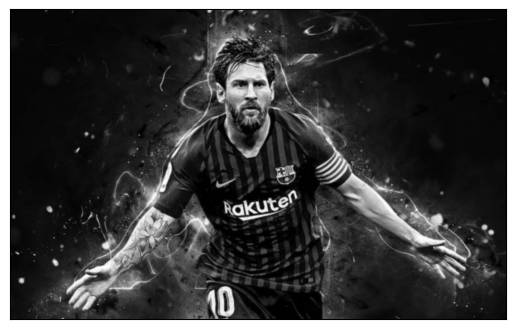

In [3]:
import numpy as np  
import cv2
from matplotlib import pyplot as plt # pyplot 라이브러리를 plt 이름으로 사용
img = cv2.imread('messi.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()


In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(1) # 내장 카메라 0번 , 외부 카메라 1번

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [4]:
import numpy as np
import cv2
cap = cv2.VideoCapture('vtest.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


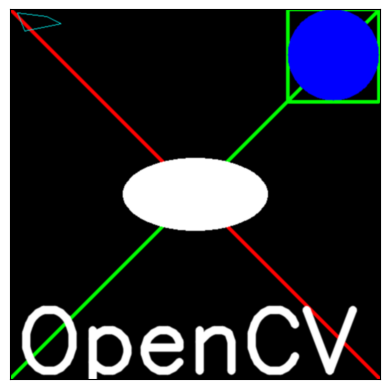

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt # pyplot 라이브러리를 plt 이름으로 사용
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),3)
img = cv2.line(img,(511,0),(0,511),(0,255,0),3)

img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

img = cv2.ellipse(img,(256,256),(100,50),0,0,360,(255,255,255),-1)
# 타원(이미지, 중심좌표, 축의 절반길이, 타원기울기, 타원 그리는 시작각도, 타원 그리는 종료각도, 색상(R,G,B), 선두께)


pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),10,cv2.LINE_AA)






plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0) # 내장 카메라 0번 , 외부 카메라 1번

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    
    frame = cv2.line(frame,(0,0),(511,511),(255,0,0),3)
    frame = cv2.line(frame,(511,0),(0,511),(0,255,0),3)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [8]:
import cv2
import numpy as np
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


In [7]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
cv2.createTrackbar('gg','image',0,1000,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

# get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    b = cv2.getTrackbarPos('gg','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
      img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()
